#### pip installed libraries 

In [1]:
!pip install shap
!pip install lime
!!pip install tabulate


['Requirement already satisfied: tabulate in c:\\users\\tkate\\anaconda3\\lib\\site-packages (0.8.10)']

#### Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from imblearn.combine import SMOTEENN
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import random
import lime
import shap
import matplotlib.gridspec as gs
import warnings
warnings.filterwarnings('ignore')


### Load train and test dataset

In [3]:
train_data= pd.read_csv("training_datas.csv")
test_data = pd.read_excel("TEST_DATA.xlsx")


#### Considering the Train data

In [4]:
train_data

,Unnamed: 0,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_range,monthlycharges_range
0,0,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.850000,2.090081e+03,No,1 - 12,21 - 40
1,1,Male,0,No,No,34,Yes,No,Yes,Yes,...,No,No,One year,No,Mailed check,56.950001,1.080809e+07,No,25 - 36,41 - 60
2,2,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.849998,1.000800e+05,Yes,1 - 12,41 - 60
3,3,Male,0,No,No,45,No,No,Yes,Yes,...,No,No,One year,No,Bank transfer (automatic),42.299999,1.080400e+07,No,37 - 48,41 - 60
4,4,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,70.699997,1.050101e+05,Yes,1 - 12,61 - 80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,2038,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.800000,1.090900e+07,No,13 - 24,81 - 100
7082,2039,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7.030602e+07,No,61 - 72,101 - 120
7083,2040,Female,0,Yes,Yes,11,No,No phone service,Yes,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.600000,3.040600e+05,No,1 - 12,21 - 40
7084,2041,Male,1,Yes,No,4,Yes,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,74.400000,3.000601e+05,Yes,1 - 12,61 - 80


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7086 non-null   int64  
 1   gender                7086 non-null   object 
 2   seniorcitizen         7086 non-null   int64  
 3   partner               7086 non-null   object 
 4   dependents            7086 non-null   object 
 5   tenure                7086 non-null   int64  
 6   phoneservice          7086 non-null   object 
 7   multiplelines         7086 non-null   object 
 8   internetservice       7086 non-null   object 
 9   onlinesecurity        7086 non-null   object 
 10  onlinebackup          7086 non-null   object 
 11  deviceprotection      7086 non-null   object 
 12  techsupport           7086 non-null   object 
 13  streamingtv           7086 non-null   object 
 14  streamingmovies       7086 non-null   object 
 15  contract             

In [6]:
train_data = train_data.drop(["Unnamed: 0", "tenure_range", "monthlycharges_range"], axis=1)
train_data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,2.090081e+03,No
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1.080809e+07,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,1.000800e+05,Yes
3,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1.080400e+07,No
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,1.050101e+05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1.090900e+07,No
7082,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7.030602e+07,No
7083,Female,0,Yes,Yes,11,No,No phone service,Yes,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,3.040600e+05,No
7084,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,3.000601e+05,Yes


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7086 non-null   object 
 1   seniorcitizen     7086 non-null   int64  
 2   partner           7086 non-null   object 
 3   dependents        7086 non-null   object 
 4   tenure            7086 non-null   int64  
 5   phoneservice      7086 non-null   object 
 6   multiplelines     7086 non-null   object 
 7   internetservice   7086 non-null   object 
 8   onlinesecurity    7086 non-null   object 
 9   onlinebackup      7086 non-null   object 
 10  deviceprotection  7086 non-null   object 
 11  techsupport       7086 non-null   object 
 12  streamingtv       7086 non-null   object 
 13  streamingmovies   7086 non-null   object 
 14  contract          7086 non-null   object 
 15  paperlessbilling  7086 non-null   object 
 16  paymentmethod     7086 non-null   object 


In [8]:
# Count the number of samples in each class
class_counts = train_data['churn'].value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(train_data)

print("Class Distribution:")
print(class_counts)

print("\nClass Proportions:")
print(class_proportions)

Class Distribution:
No     5194
Yes    1892
Name: churn, dtype: int64

Class Proportions:
No     0.732995
Yes    0.267005
Name: churn, dtype: float64


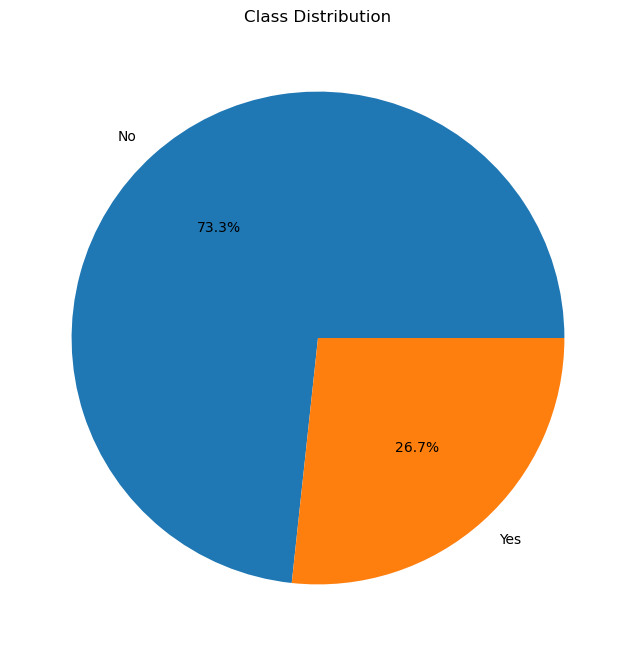

In [9]:
# Count the number of samples in each class
class_counts = train_data['churn'].value_counts()

# Get the class labels and their counts
labels = class_counts.index
counts = class_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [10]:
train_data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7086.000000,7086.000000,7086.000000,7.086000e+03
mean,0.164126,32.597516,64.981329,1.909487e+07
std,0.370416,24.483936,30.038249,2.209079e+07
min,0.000000,0.000000,18.400000,0.000000e+00
25%,0.000000,9.000000,35.762500,4.010700e+05
50%,0.000000,30.000000,70.449997,1.030907e+07
75%,0.000000,55.750000,89.900002,3.080501e+07
max,1.000000,72.000000,118.650002,8.060700e+07


#### Considering the Test data

In [11]:
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [13]:
empty_strings = test_data[test_data["TotalCharges"] == ' ']
empty_strings

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,


In [14]:
# Convert empty strings to NaN
test_data["TotalCharges"] = test_data["TotalCharges"].replace(' ', np.nan)

# Convert the column to float
test_data["TotalCharges"] = test_data["TotalCharges"].astype(float)

# Calculate the column mean
mean_total_charges = test_data["TotalCharges"].mean()

# Impute NaN values with the mean
test_data["TotalCharges"].fillna(mean_total_charges, inplace=True)


In [15]:
is_dash_present = "-" in test_data.values
is_dash_present

False

In [16]:
is_empty_present = " " in test_data.values
is_empty_present

False

In [17]:
test_data = test_data.drop(["customerID"], axis=1 )
test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30
1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70
1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [18]:
# make all column names lowercase
test_data.columns = map(str.lower, test_data.columns)
test_data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30
1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70
1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [19]:
test_data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325,2235.995093
std,0.368084,24.632677,30.136858,2258.097978
min,0.000000,0.000000,18.250000,18.900000
25%,0.000000,8.000000,34.250000,354.812500
50%,0.000000,27.000000,69.800000,1389.475000
75%,0.000000,55.000000,89.275000,3626.262500
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   seniorcitizen     2000 non-null   int64  
 2   partner           2000 non-null   object 
 3   dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   phoneservice      2000 non-null   object 
 6   multiplelines     2000 non-null   object 
 7   internetservice   2000 non-null   object 
 8   onlinesecurity    2000 non-null   object 
 9   onlinebackup      2000 non-null   object 
 10  deviceprotection  2000 non-null   object 
 11  techsupport       2000 non-null   object 
 12  streamingtv       2000 non-null   object 
 13  streamingmovies   2000 non-null   object 
 14  contract          2000 non-null   object 
 15  paperlessbilling  2000 non-null   object 
 16  paymentmethod     2000 non-null   object 


In [21]:
# Explore the data: Check data shape, data types, summary statistics, etc.
#print(all_data.shape)
#print(all_data.head())
#print(all_data.info())
#print(all_data.describe())

# Handle missing values: Drop columns with high missing values or impute missing values
#all_data.dropna(thresh=len(all_data) * 0.8, axis=1, inplace=True)  # Drop columns with >80% missing values
#all_data.fillna(all_data.mean(), inplace=True)  # Impute missing values with column mean


### Split the Data into Training and Testing Sets

In [22]:
# Split the data into features (X) and target variable (y)
X = train_data.drop('churn', axis=1)
y = train_data['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (5668, 19) (5668,)
Test set shape: (1418, 19) (1418,)


#### Feature Encoding (on Training and Test Data)

In [23]:
# Perform one-hot encoding on categorical variables in the training data
X_train_encoded = pd.get_dummies(X_train)

# Perform one-hot encoding on categorical variables in the test data
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of the encoded test data with the encoded training data
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [24]:
# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_encoded, y_train)


### Feature scaling

In [25]:
# Scale the numeric features in the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [26]:
X_train_encoded

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
3411,1,1,24.800000,2.040080e+03,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5776,0,71,19.850000,1.030206e+07,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5125,0,21,19.800000,3.050000e+05,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
530,0,24,21.100000,4.090001e+05,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
6405,0,2,74.900000,1.030600e+05,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,69,81.950000,5.060001e+07,0,1,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
5191,0,65,99.350000,6.030407e+07,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
5226,1,34,79.600000,2.070108e+07,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
5390,0,72,116.950000,8.050904e+07,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0


### MACHINE LEARNING MODELING 

#### Logistic regression model for unbalanced dataset

In [27]:
# Initialize and train classification models
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test_scaled)

In [29]:
# Calculate accuracy for logistic regression classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.808885754583921

In [30]:
# Classification report for Logistic Regression
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", classification_report_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      1044
         Yes       0.67      0.55      0.60       374

    accuracy                           0.81      1418
   macro avg       0.76      0.72      0.74      1418
weighted avg       0.80      0.81      0.80      1418



#### Logistic regression model for balanced dataset 

In [31]:
# Instantiate the logistic regression model
logistic_regression = LogisticRegression()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the logistic regression model on the resampled data
logistic_regression.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [32]:
# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test_scaled)
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_lr
#y_pred_lr = np.where(y_pred_lr == 'No', 0, 1)


In [33]:
# Calculate accuracy for logistic regression classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7016925246826516

In [34]:
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", classification_report_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.65      0.76      1044
         Yes       0.46      0.85      0.60       374

    accuracy                           0.70      1418
   macro avg       0.69      0.75      0.68      1418
weighted avg       0.80      0.70      0.72      1418



#### Decision Tree Classifier model for unbalanced dataset

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [36]:
# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)

In [37]:
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_dt
#y_pred_dt = np.where(y_pred_dt == 'No', 0, 1)

In [38]:
# Calculate accuracy for dicision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt


0.8561354019746121

In [39]:
# Classification report for Decision Tree
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision_Tree Classification Report:\n", classification_report_dt)

Decision_Tree Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.91      0.90      1044
         Yes       0.74      0.70      0.72       374

    accuracy                           0.86      1418
   macro avg       0.82      0.81      0.81      1418
weighted avg       0.85      0.86      0.85      1418



#### Decision Tree Classifier model for  balanced dataset

In [40]:
# Instantiate the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the decision tree classifier on the resampled data
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [41]:
# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_dt
#y_pred_dt = np.where(y_pred_dt == 'No', 0, 1)

In [42]:
# Calculate accuracy for dicision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7574047954866009

In [43]:
# Classification report for Decision Tree
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision_Tree Classification Report:\n", classification_report_dt)

Decision_Tree Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.74      0.82      1044
         Yes       0.53      0.80      0.63       374

    accuracy                           0.76      1418
   macro avg       0.72      0.77      0.73      1418
weighted avg       0.81      0.76      0.77      1418



#### Support Vector Machines model for unbalanced dataset

In [44]:
svm = SVC()
svm.fit(X_train_scaled, y_train)


SVC()

In [45]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_scaled)

In [46]:
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_svm
#y_pred_svm = np.where(y_pred_svm == 'No', 0, 1)

In [47]:
# Calculate accuracy for support vector machine classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.8201692524682651

In [48]:
# Classification report for SVM
classification_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.92      0.88      1044
         Yes       0.71      0.53      0.61       374

    accuracy                           0.82      1418
   macro avg       0.78      0.73      0.75      1418
weighted avg       0.81      0.82      0.81      1418



#### Support Vector Machines model for balanced dataset 

In [49]:
# Instantiate the SVM model
svm = SVC()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the SVM model on the resampled data
svm.fit(X_train_resampled, y_train_resampled)

SVC()

In [50]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_scaled)
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_svm
#y_pred_svm = np.where(y_pred_svm == 'No', 0, 1)

In [51]:
# Calculate accuracy for support vector machine classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.7291960507757405

In [52]:
# Classification report for SVM
classification_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.69      0.79      1044
         Yes       0.49      0.85      0.62       374

    accuracy                           0.73      1418
   macro avg       0.71      0.77      0.71      1418
weighted avg       0.81      0.73      0.75      1418



#### Confirm sample on each classes

In [53]:
# Count the number of samples in each class
class_counts = pd.Series(y_train_resampled).value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(y_train_resampled)

# Display the class distribution
print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

Class Distribution:
Yes    3340
No     2542
Name: churn, dtype: int64

Class Proportions:
Yes    0.567834
No     0.432166
Name: churn, dtype: float64


#### Random forest model for unbalanced dataset

In [54]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [55]:
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

In [56]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8843441466854725

In [57]:
# Classification report for Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.95      0.92      1044
         Yes       0.83      0.71      0.76       374

    accuracy                           0.88      1418
   macro avg       0.86      0.83      0.84      1418
weighted avg       0.88      0.88      0.88      1418



#### Random forest model for balancing dataset 

In [58]:
# Instantiate the Random Forest model
random_forest = RandomForestClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the Random Forest model on the resampled data
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [59]:
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Convert 'No' to 0 and 'Yes' to 1 in y_pred_rf
#y_pred_rf = np.where(y_pred_rf == 'No', 0, 1)

In [60]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.771509167842031

In [61]:
# Classification report for Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.76      0.83      1044
         Yes       0.55      0.81      0.65       374

    accuracy                           0.77      1418
   macro avg       0.73      0.78      0.74      1418
weighted avg       0.82      0.77      0.78      1418



#### Adaboost model for unbalanced dataset

In [62]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Train the model
adaboost.fit(X_train_scaled, y_train)


AdaBoostClassifier()

In [63]:
# Make predictions on the test data
y_pred_adaboost = adaboost.predict(X_test_scaled)


In [64]:
# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_adaboost

0.8004231311706629

In [65]:
# Classification report for Adaboost
classification_report_ab = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classification Report:\n", classification_report_ab)

AdaBoost Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1044
         Yes       0.65      0.53      0.58       374

    accuracy                           0.80      1418
   macro avg       0.75      0.71      0.73      1418
weighted avg       0.79      0.80      0.79      1418



####  Adaboost model for balanced  dataset

In [66]:

# Instantiate the AdaBoostClassifier model
adaboost = AdaBoostClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the AdaBoostClassifier model on the resampled data
adaboost.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier()

In [67]:
# Make predictions on the test set
y_pred_adaboost = adaboost.predict(X_test_scaled)


In [68]:
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_adaboost


0.7150916784203103

In [69]:
# Classification report for Adaboost
classification_report_ab = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classification Report:\n", classification_report_ab)

AdaBoost Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.66      0.77      1044
         Yes       0.48      0.86      0.61       374

    accuracy                           0.72      1418
   macro avg       0.70      0.76      0.69      1418
weighted avg       0.81      0.72      0.73      1418



#### Naive Bayes model for unbalanced data 

In [70]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [71]:
# Make predictions on the test set
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes

0.6819464033850494

In [72]:
# Classification report for Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_naive_bayes)
print("Naive Bayes Classification Report:\n", classification_report_nb)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.63      0.74      1044
         Yes       0.45      0.84      0.58       374

    accuracy                           0.68      1418
   macro avg       0.68      0.73      0.66      1418
weighted avg       0.79      0.68      0.70      1418



#### Naive Bayes model for balanced dataset

In [73]:

# Instantiate the Naive Bayes model
naive_bayes = GaussianNB()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the Naive Bayes model on the resampled data
naive_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [74]:
# Make predictions on the test set
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes

0.6636107193229901

In [75]:
# Classification report for Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_naive_bayes)
print("Naive Bayes Classification Report:\n", classification_report_nb)


Naive Bayes Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.59      0.72      1044
         Yes       0.43      0.86      0.57       374

    accuracy                           0.66      1418
   macro avg       0.68      0.73      0.65      1418
weighted avg       0.79      0.66      0.68      1418




#### KNN Classification for unbalanced data 

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [77]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.7940761636107193

In [78]:
# Classification report for KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", classification_report_knn)

KNN Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.87      0.86      1044
         Yes       0.62      0.58      0.60       374

    accuracy                           0.79      1418
   macro avg       0.73      0.73      0.73      1418
weighted avg       0.79      0.79      0.79      1418



#### KNN model for balanced data

In [79]:
# Instantiate the KNN model
knn = KNeighborsClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the KNN model on the resampled data
knn.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier()

In [80]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.6826516220028209

In [81]:
# Classification report for KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", classification_report_knn)

KNN Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.62      0.74      1044
         Yes       0.45      0.86      0.59       374

    accuracy                           0.68      1418
   macro avg       0.69      0.74      0.66      1418
weighted avg       0.80      0.68      0.70      1418



#### F1 score visualizations 

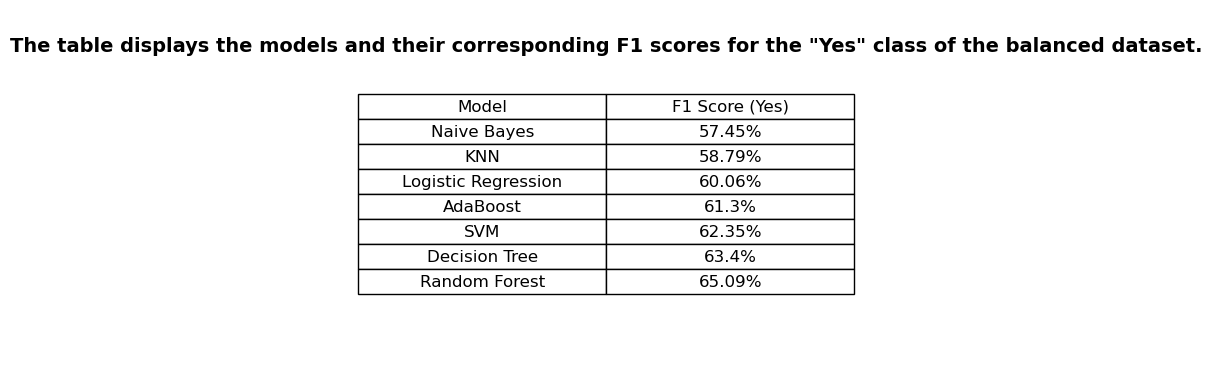

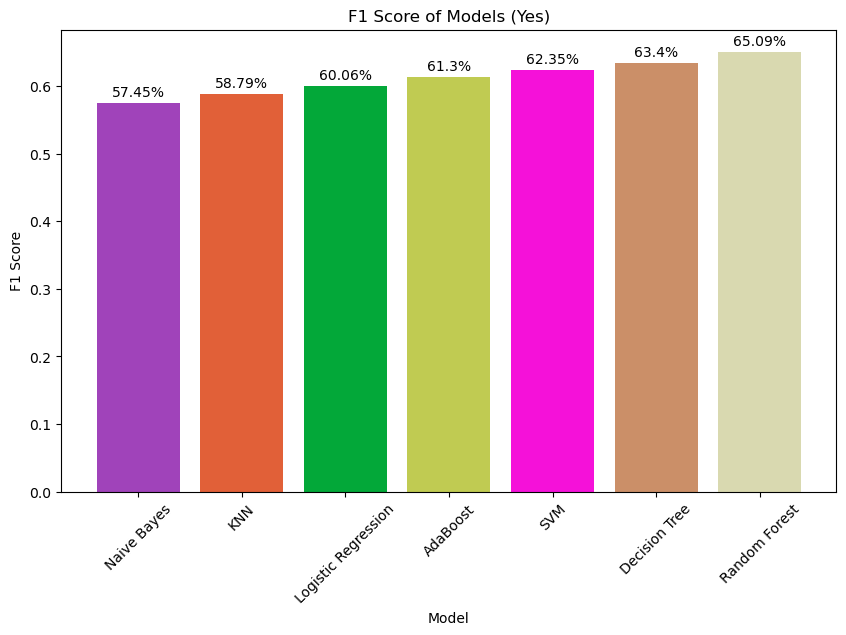

In [82]:
# Define the models and their respective F1 scores
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest',
          'AdaBoost', 'Naive Bayes', 'KNN']
f1_scores = [f1_score(y_test, y_pred_lr, pos_label='Yes'),
             f1_score(y_test, y_pred_dt, pos_label='Yes'),
             f1_score(y_test, y_pred_svm, pos_label='Yes'),
             f1_score(y_test, y_pred_rf, pos_label='Yes'),
             f1_score(y_test, y_pred_adaboost, pos_label='Yes'),
             f1_score(y_test, y_pred_naive_bayes, pos_label='Yes'),
             f1_score(y_test, y_pred_knn, pos_label='Yes')]

# Sort the models and F1 scores in the same order for the table and the bar chart
sorted_indices = np.argsort(f1_scores)
models_sorted = [models[i] for i in sorted_indices]
f1_scores_sorted = [f1_scores[i] for i in sorted_indices]

# Generate a list of random colors
random.seed(42)
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(models))]

# Create a table to display the corresponding values with F1 scores
cell_text = [[model, f'{np.round(score * 100, 2)}%'] for model, score in zip(models_sorted, f1_scores_sorted)]
table = plt.table(cellText=cell_text,
                  colLabels=['Model', 'F1 Score (Yes)'],
                  cellLoc='center',
                  loc='center')

# Adjust the table layout
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Hide the axis labels and ticks
plt.axis('off')

# Add a description above the table
description = 'The table displays the models and their corresponding F1 scores for the "Yes" class of the balanced dataset.'
plt.text(0.5, 0.9, description, ha='center', va='center', fontsize=14, fontweight='bold')

# Show the table
plt.show()


# Create a bar plot to visualize the F1 scores with different colors
plt.figure(figsize=(10, 6))
plt.bar(models_sorted, f1_scores_sorted, color=colors)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models (Yes)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add the accuracy values on top of each bar
for i, acc in enumerate(f1_scores_sorted):
    plt.text(i, acc + 0.01, f'{np.round(acc*100, 2)}%', ha='center')

# Show the plot
plt.show()


#### Accuracy  results visualizations

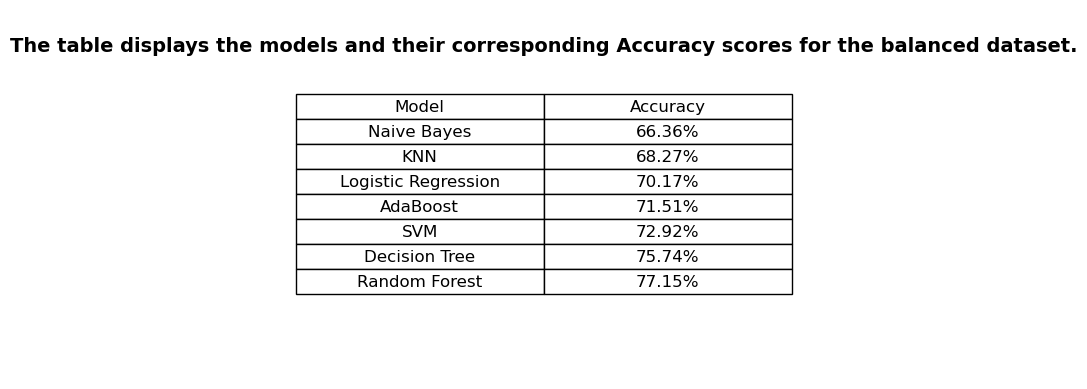

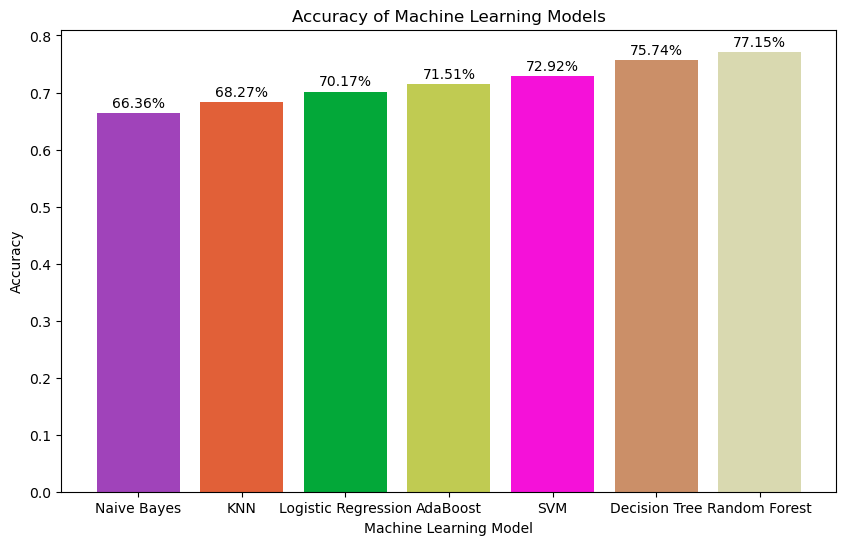

In [83]:
# Define the models and their respective accuracies
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest',
          'AdaBoost', 'Naive Bayes', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_adaboost),
              accuracy_score(y_test, y_pred_naive_bayes),
              accuracy_score(y_test, y_pred_knn)]

# Sort the models and accuracies in ascending order
sorted_indices = np.argsort(accuracies)
models_sorted = [models[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]

# Generate a list of random colors
random.seed(42)
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(models))]

# Create a table to display the corresponding values with accuracy
cell_text = [[model, f'{np.round(acc*100, 2)}%'] for model, acc in zip(models_sorted, accuracies_sorted)]
table = plt.table(cellText=cell_text,
                  colLabels=['Model', 'Accuracy'],
                  cellLoc='center',
                  loc='center')

# Adjust the table layout
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Hide the axis labels and ticks
plt.axis('off')

# Add a description above the table
description = 'The table displays the models and their corresponding Accuracy scores for the balanced dataset.'
plt.text(0.5, 0.9, description, ha='center', va='center', fontsize=14, fontweight='bold')

# Show the table
plt.show()

# Create a bar plot to visualize the accuracies with different colors
plt.figure(figsize=(10, 6))
plt.bar(models_sorted, accuracies_sorted, color=colors)

# Add labels and title
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')

# Add the accuracy values on top of each bar
for i, acc in enumerate(accuracies_sorted):
    plt.text(i, acc + 0.01, f'{np.round(acc*100, 2)}%', ha='center')

# Show the plot
plt.show()


### Interpretation of best model 

To gain a deeper understanding of the predictions made by our best-performing model, Random Forest, we employed the Local Interpretable Model-agnostic Explanations (LIME) technique, which allowed us to generate insightful interpretations of its decision-making process.

#### LIME summary

In [85]:
# Create an instance of the LogisticRegression model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Perform data imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

# Perform data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X_train_numeric.columns.tolist(), class_names=['0', '1'])


# Select a sample instance for explanation
sample_instance = X_test_scaled[0]

# Generate LIME explanation
lime_explanation = explainer_lime.explain_instance(sample_instance, model.predict_proba, num_features=len(X_train_numeric.columns))

# Print LIME explanation
lime_explanation.show_in_notebook(show_all=False)


Based on this interpretation, the model predicts a higher probability for class 0 (0.55) compared to class 1 (0.45). The monthlycharges and seniorcitizen features contribute more towards the prediction of class 1, while the tenure and totalcharges features have a stronger influence on the prediction of class 0.

#### SHAP summary plot

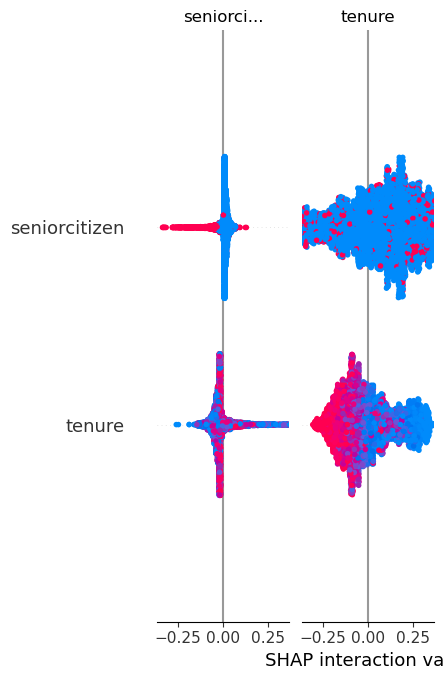

In [86]:
# Initialize SHAP explainer
explainer_shap = shap.Explainer(model)

# Generate SHAP values
shap_values = explainer_shap(X_train_scaled)

# Plot SHAP summary plot
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_numeric, show=False, plot_size=(8, 6))
plt.show()


#### Hyperparameter Tuning (on Training Data)

In [87]:

# Dictionary containing the selected models
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {            
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [10, 20, 50, 200, 200] 
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Loop through each model and train it using 5-fold cross-validation
for model_name, model_params in models.items():
    print('Training model: {}'.format(model_name))
    model = model_params['model']
    params = model_params['params']
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best score for {model_name}: {grid_search.best_score_}')
    print(f'Best estimator for {model_name}: {grid_search.best_estimator_}')
    


Training model: Random Forest
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.8440373841668339
Best estimator for Random Forest: RandomForestClassifier(max_depth=20, n_estimators=50)
Training model: SVM
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best score for SVM: 0.7904027172635587
Best estimator for SVM: SVC(C=1)
Training model: Decision Tree
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.8166893157184418
Best estimator for Decision Tree: DecisionTreeClassifier(criterion='entropy')


Based on the hyperparameter tuning results, the Random Forest model achieved the highest score of 0.844, followed by the Decision Tree model with a score of 0.817, and the SVM model with a score of 0.79.

Considering these results, the recommendation would be to use the Random Forest model as it demonstrated the best performance on the training data. The Random Forest model benefits from its ability to handle complex relationships in the data, reduce overfitting through ensemble learning, and provide feature importance analysis.

### Save the model

To ensure future accessibility and reusability, it is recommended to save the best model using the pickle.

In [88]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as Telco_churn:
    pickle.dump(grid_search, Telco_churn)

### Model Deployment and Prediction (using the Trained Model)



In [ ]:
# Use the best model to make predictions on the test data (X_test_scaled)
#test_predictions = best_model.predict(X_test_scaled)

# Make predictions on the validation data using the best model
#val_predictions = best_model.predict(X_val_scaled)

# Evaluate the performance of the best model on the validation data
#val_accuracy = accuracy_score(y_val_split, val_predictions)

# Perform any necessary post-processing or analysis on the test predictions
